In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear
import sklearn.model_selection as model
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
data.DEATH_EVENT == 0

0      False
1      False
2      False
3      False
4      False
       ...  
294     True
295     True
296     True
297     True
298     True
Name: DEATH_EVENT, Length: 299, dtype: bool

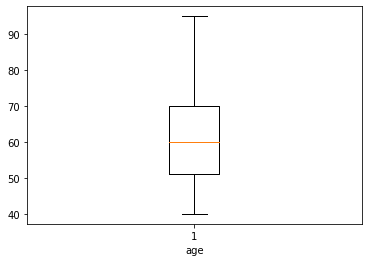

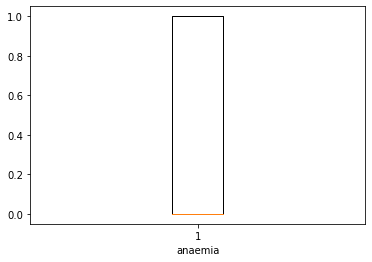

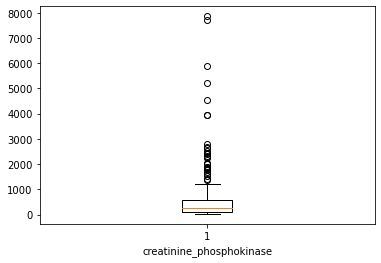

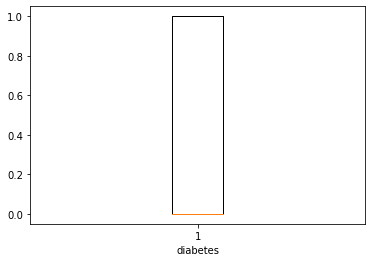

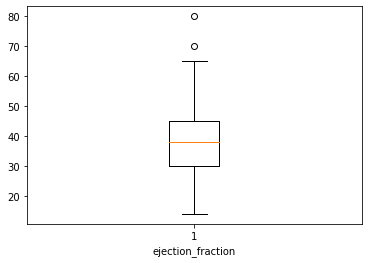

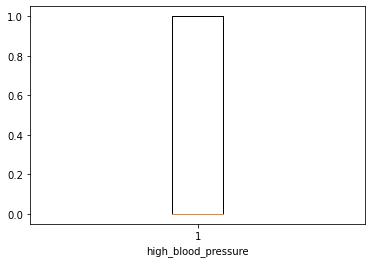

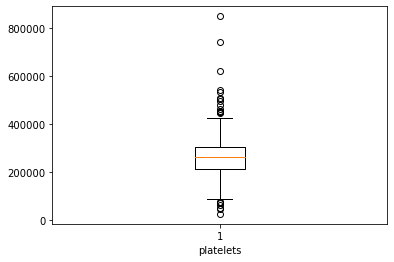

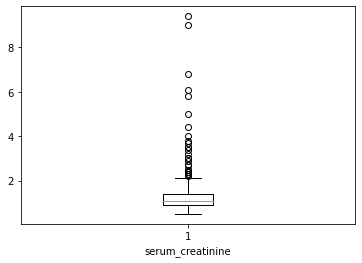

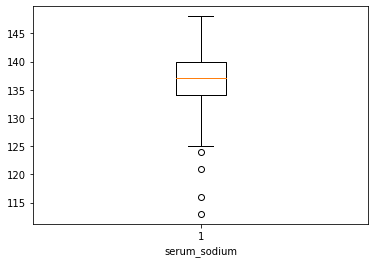

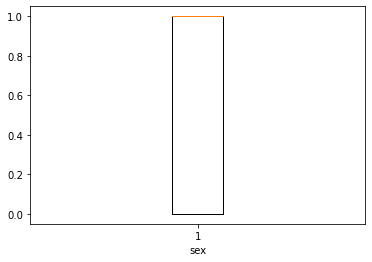

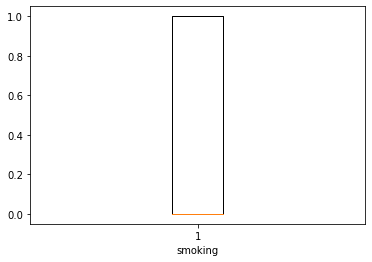

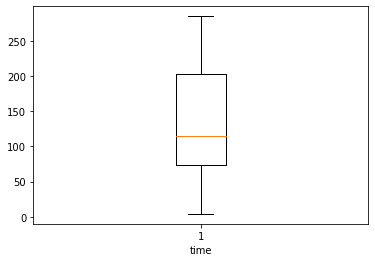

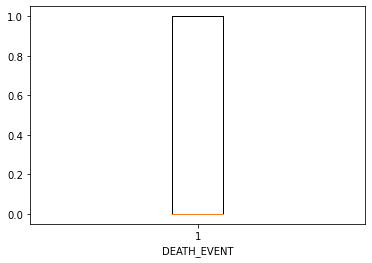

In [6]:
for i in data.columns:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [7]:
dependent = data.drop("DEATH_EVENT",axis=1)
independent = data["DEATH_EVENT"]

In [8]:
xtrain,xtest,ytrain,ytest = model.train_test_split(dependent,independent,test_size=75)

In [9]:
logistic = linear.LogisticRegression()

In [10]:
logistic.fit(xtrain,ytrain)

LogisticRegression()

In [11]:
[list(data.iloc[295])]

[[55.0,
  0.0,
  1820.0,
  0.0,
  38.0,
  0.0,
  270000.0,
  1.2,
  139.0,
  0.0,
  0.0,
  271.0,
  0.0]]

In [12]:
logistic.predict([list(data.iloc[295])[:-1]])

array([0], dtype=int64)

In [13]:
y_actual = logistic.predict(xtest)

In [14]:
metrics.confusion_matrix(y_actual,ytest)

array([[48,  8],
       [ 4, 15]], dtype=int64)

In [15]:
"Accuracy = {0:.2f} ".format((logistic.score(xtrain,ytrain)*100))

'Accuracy = 82.14 '